/Users/mnozkiewicz/Magisterka/Wizualizacja/venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/mnozkiewicz/Magisterka/Wizualizacja/venv/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/var/folders/7m/87bnqyhx3cn6hr25n2wk3d5c0000gn/T/ipykernel_81644/2925595255.py:16: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, img_key="hires", size=1.5)


Dataset shape: (2688, 18078)
Number of spots: 2688
Number of genes: 18078
Available annotations: ['in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster']


<Figure size 1000x1000 with 0 Axes>

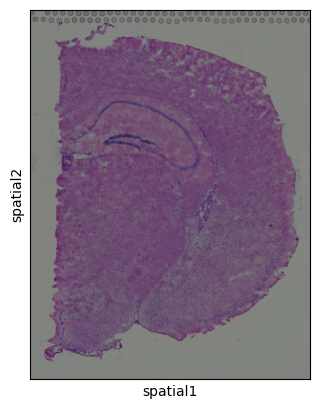

In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import numpy as np

adata = sq.datasets.visium_hne_adata()
 
# Basic data exploration
print(f"Dataset shape: {adata.shape}")
print(f"Number of spots: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")
print(f"Available annotations: {list(adata.obs.columns)}")
 
# View tissue image with spots overlaid
plt.figure(figsize=(10, 10))
sc.pl.spatial(adata, img_key="hires", size=1.5)
 
# If annotation is available, visualize with layer annotation
if 'layer_guess' in adata.obs.columns:
    plt.figure(figsize=(10, 10))
    sc.pl.spatial(adata, color='layer_guess', size=1.5)

In [2]:
# Display the first few entries of the gene expression matrix
print("Gene expression matrix (first 5 spots, first 5 genes):")
print(adata.X[0:5, 0:5].toarray())
 
# Display spatial coordinates
print("\nSpatial coordinates (first 5 spots):")
print(adata.obsm['spatial'][0:5])
 
# Check available layers in the AnnData object
print("\nAvailable layers:", list(adata.layers.keys()))
 
# Check available metadata
print("\nSpot metadata:")
print(adata.obs.head())
 
# Check gene metadata
print("\nGene metadata:")
print(adata.var.head())

Gene expression matrix (first 5 spots, first 5 genes):
[[0.         0.         0.87893134 0.87893134 1.3393729 ]
 [0.         0.         1.0922161  1.0922161  1.0922161 ]
 [0.         0.         0.         0.         0.9803591 ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.99697125 0.         0.6179012 ]]

Spatial coordinates (first 5 spots):
[[8230 7237]
 [4170 1611]
 [2519 8315]
 [7679 2927]
 [3138 6280]]

Available layers: []

Spot metadata:
                    in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4928   
AAACAATCTACTAGCA-1          1          3         43               3448   
AAACACCAATAACTGC-1          1         59         19               6022   
AAACAGAGCGACTCCT-1          1         14         94               4311   
AAACCGGGTAGGTACC-1          1         42         28               5787   

                    log1p_n_genes_by_counts  total_counts  log1p_to

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


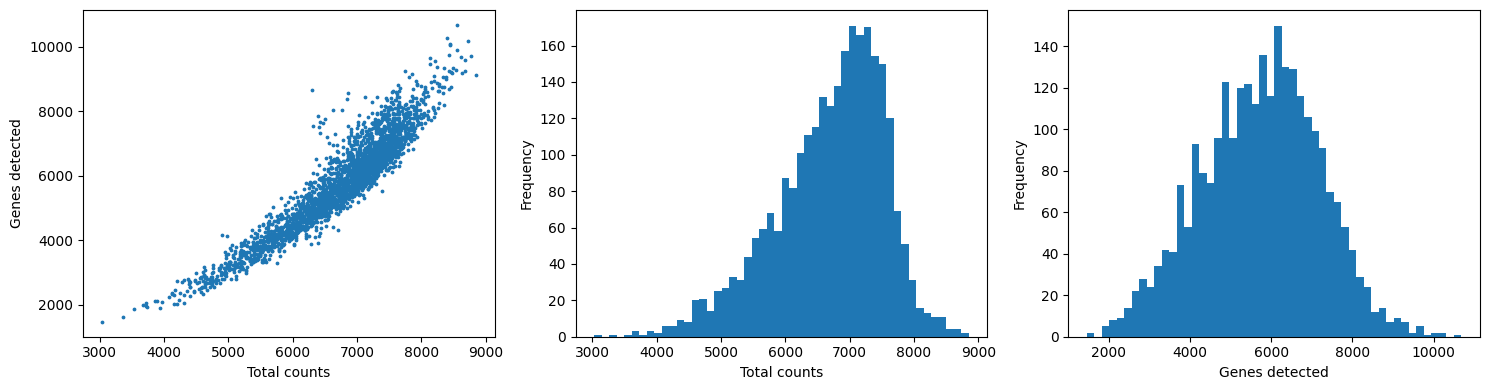

Number of highly variable genes: 2000


<Figure size 800x600 with 0 Axes>

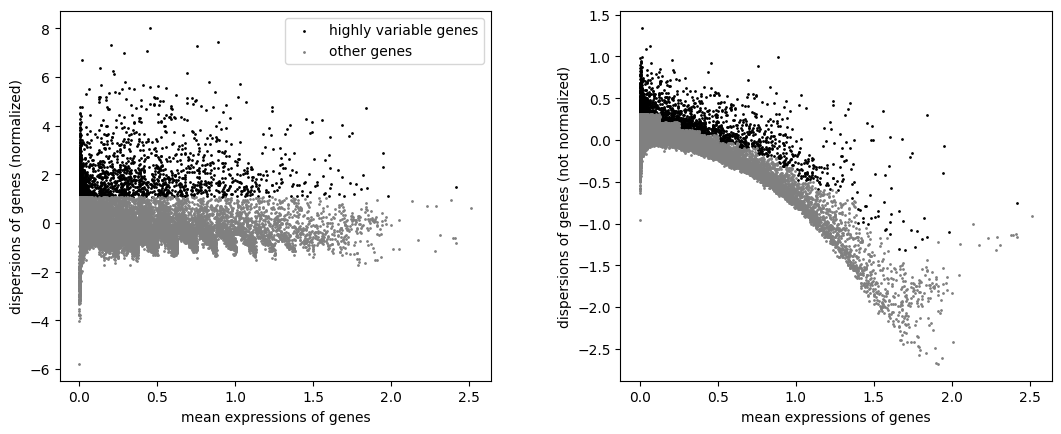

Filtered data shape: (2688, 2000)


/Users/mnozkiewicz/Magisterka/Wizualizacja/venv/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


<Figure size 1000x800 with 0 Axes>

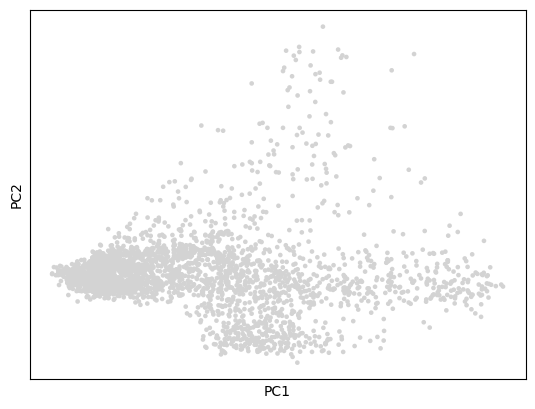

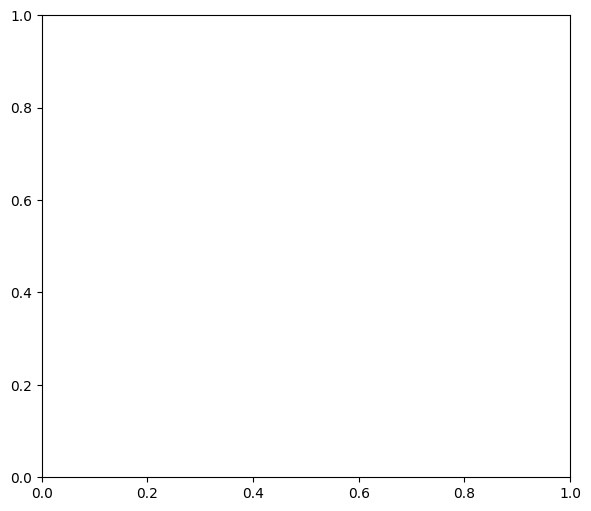

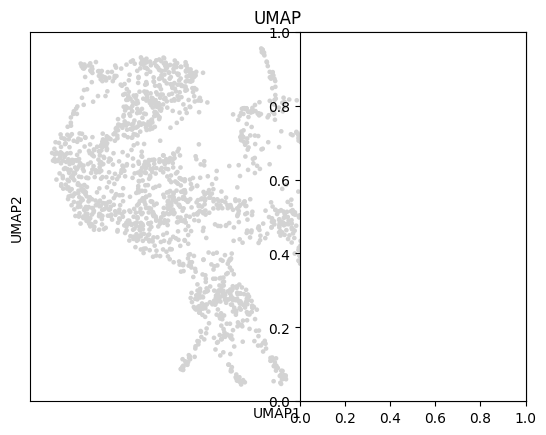

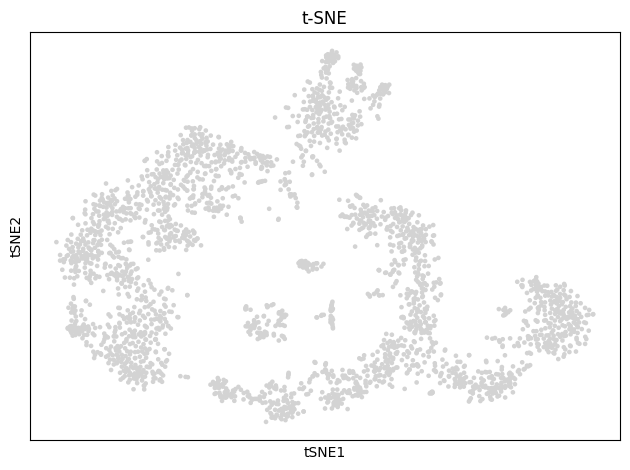

/var/folders/7m/87bnqyhx3cn6hr25n2wk3d5c0000gn/T/ipykernel_81644/3596565831.py:80: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg)


Number of clusters: 20


In [3]:
# Quality control
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
 
# Visualize QC metrics
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(adata.obs.total_counts, adata.obs.n_genes_by_counts, s=3)
plt.xlabel('Total counts')
plt.ylabel('Genes detected')
plt.subplot(1, 3, 2)
plt.hist(adata.obs.total_counts, bins=50)
plt.xlabel('Total counts')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
plt.hist(adata.obs.n_genes_by_counts, bins=50)
plt.xlabel('Genes detected')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
 
# Filter out spots with low quality if needed
# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=3)
 
# Normalize data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
 
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
print(f"Number of highly variable genes: {sum(adata.var.highly_variable)}")
 
# Plot variable genes
plt.figure(figsize=(8, 6))
sc.pl.highly_variable_genes(adata)
 
# Filter to highly variable genes
adata_hvg = adata[:, adata.var.highly_variable]
print(f"Filtered data shape: {adata_hvg.shape}")
 
# Scale data
sc.pp.scale(adata_hvg)
 
# Compute PCA
sc.tl.pca(adata_hvg, svd_solver='arpack')
 
# Visualize PCA
plt.figure(figsize=(10, 8))
sc.pl.pca(adata_hvg, color='layer_guess' if 'layer_guess' in adata.obs.columns else None)
 
# Compute neighborhood graph
sc.pp.neighbors(adata_hvg, n_neighbors=10, n_pcs=30)
 
# Run UMAP and t-SNE
sc.tl.umap(adata_hvg)
sc.tl.tsne(adata_hvg)
 
# Visualize embeddings
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sc.pl.umap(adata_hvg, color='layer_guess' if 'layer_guess' in adata.obs.columns else None, show=False)
plt.title("UMAP")
plt.subplot(1, 2, 2)
sc.pl.tsne(adata_hvg, color='layer_guess' if 'layer_guess' in adata.obs.columns else None, show=False)
plt.title("t-SNE")
plt.tight_layout()
plt.show()
 
# Prepare data for neural network
X = adata_hvg.X.copy()  # Use highly variable genes
 
# If layer_guess is available, prepare class labels
if 'layer_guess' in adata.obs.columns:
    layer_categories = adata.obs['layer_guess'].cat.categories
    y = adata.obs['layer_guess'].cat.codes.values
    print(f"Number of layers/classes: {len(layer_categories)}")
    print(f"Layer categories: {layer_categories}")
else:
    # If no annotations, we can use clustering
    sc.tl.leiden(adata_hvg)
    y = adata_hvg.obs['leiden'].astype('category').cat.codes.values
    print(f"Number of clusters: {len(np.unique(y))}")

In [4]:
from numpy import indices
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch

class NetworkDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

y = y.astype(np.int64)
indices = np.arange(len(y))

X_train, X_temp, y_train, y_temp, train_ind, temp_ind = train_test_split(X, y, indices, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test, val_ind, test_ind = train_test_split(X_temp, y_temp, temp_ind, test_size=0.5, random_state=42)

train_loader = DataLoader(NetworkDataset(X_train, y_train), batch_size=64)
val_loader = DataLoader(NetworkDataset(X_val, y_val), batch_size=64)
test_loader = DataLoader(NetworkDataset(X_test, y_test), batch_size=64)

In [5]:
from collections import OrderedDict
import torch.nn as nn

class Network(nn.Module):

    def __init__(self, dropout: float = 0.5):
        super().__init__()

        self.dropout = dropout
        self.model = nn.Sequential(OrderedDict([
            ('linear1', nn.Linear(2000, 256)),
            ('relu1', nn.ReLU()),
            ('dropout1', nn.Dropout(0.5)),
            ('linear2', nn.Linear(256, 64)),
            ('relu2', nn.ReLU()),
            ('dropout2', nn.Dropout(0.5)),
            ('linear3', nn.Linear(64, 20)),
        ]))
 
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.model(x)

    @torch.no_grad
    def retrieve_hidden_states(self, x, target_name: str) -> torch.Tensor:
        self.eval()
        if target_name == "input_layer":
            return x
        for layer_name, layer in self.model.named_children():
            x = layer(x)
            if layer_name == target_name:
                return x
        
        raise ValueError(f"Model does not have a layer named: {layer_name}")


In [6]:
import torch.optim as optim
from copy import deepcopy
from typing import Callable


def evaluate_model(
        model: nn.Module,
        loader: DataLoader,
        loss_fn: Callable
    ) -> tuple[float, float]:

    total_loss = 0.0
    correct = 0
    total_images = 0
    number_of_batches = 0

    model = model.eval()
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images, labels
            outputs = model(images)
            
            batch_loss = loss_fn(outputs, labels)
            total_loss += batch_loss.item()

            correct += (outputs.argmax(axis=1) == labels).sum()
            total_images += outputs.shape[0]

            number_of_batches += 1

    average_loss = total_loss / number_of_batches
    accuracy = correct / total_images

    return average_loss, accuracy


def plot_training_stats(train_loss: list[float], val_loss: list[float]) -> None:
    epochs = len(train_loss)
    plt.xticks(range(0, epochs, 3))

    plt.plot(train_loss, color='red', label="Training loss")
    plt.plot(val_loss, color='blue', label="Validation loss")

    plt.xlabel("Epoch number")
    plt.ylabel("Average batch loss")

    plt.legend()
    plt.show()
    

def train_model(
        model: Network, 
        train_loader: DataLoader, 
        val_loader: DataLoader,
    ) -> Network:

    optimizer = optim.AdamW(model.parameters())
    criterion = nn.CrossEntropyLoss()

    best_model, best_loss = model, float("inf")
    steps_without_improvement = 0
    train_losses, val_losses = [], []

    for epoch in range(20):
        epoch_loss = 0.0
        number_of_batches = 0
        model.train()

        for inputs, labels in train_loader:
            inputs, labels = inputs, labels
            
            outputs = model(inputs)
            batch_loss = criterion(outputs, labels)
            batch_loss.backward()

            optimizer.step()
            optimizer.zero_grad()
        
            epoch_loss += batch_loss.item()
            number_of_batches += 1
        
        train_loss = epoch_loss / number_of_batches
        train_losses.append(train_loss)

        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion)
        val_losses.append(val_loss)

        if epoch % 4 == 0:
            print(f"Epoch {epoch}")
            print(f"Train average loss: {train_loss:.3f}, Validation average loss: {val_loss:.3f}")
            print(f"Validation accuracy: {100*val_accuracy:.2f}%\n")

        if val_loss < best_loss:
            steps_without_improvement = 0
            best_loss = val_loss
            best_model = deepcopy(model)
        else:
            steps_without_improvement += 1
            if steps_without_improvement > 2:
                print("Early stopping")
                print(f"Epoch {epoch}")
                print(f"Train average loss: {train_loss:.3f}, Validation average loss: {val_loss:.3f}")
                print(f"Validation accuracy: {100*val_accuracy:.2f}%\n")
                break 
    
    plot_training_stats(train_losses, val_losses)
    return best_model

Epoch 0
Train average loss: 2.285, Validation average loss: 1.193
Validation accuracy: 68.96%

Epoch 4
Train average loss: 0.271, Validation average loss: 0.273
Validation accuracy: 91.26%

Epoch 8
Train average loss: 0.106, Validation average loss: 0.249
Validation accuracy: 90.71%

Early stopping
Epoch 10
Train average loss: 0.075, Validation average loss: 0.246
Validation accuracy: 91.26%



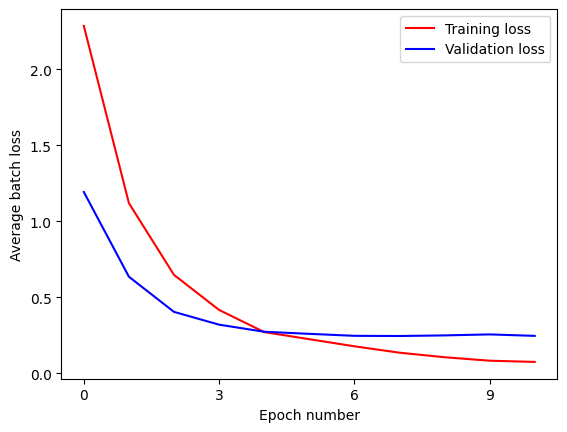

In [7]:
net = Network()
net = train_model(net, train_loader, val_loader)

In [8]:
def retrieve_layer_outputs(model: Network, loader: DataLoader, layer_name: str) -> tuple[torch.Tensor, torch.Tensor]:
    all_hidden_states = []
    all_labels = []

    for batch, labels in loader:
        batch_hidden_states = model.retrieve_hidden_states(batch, layer_name)
        all_hidden_states.append(batch_hidden_states)
        all_labels.append(labels)

    return torch.concat(all_hidden_states), torch.concat(all_labels)

In [9]:
train_input, train_labels = retrieve_layer_outputs(net, train_loader, "input_layer")
test_input, test_labels = retrieve_layer_outputs(net, test_loader, "input_layer")

train_hidden1, _ = retrieve_layer_outputs(net, train_loader, "linear1")
test_hidden1, _  = retrieve_layer_outputs(net, test_loader, "linear1")

train_hidden2, _ = retrieve_layer_outputs(net, train_loader, "linear2")
test_hidden2, _  = retrieve_layer_outputs(net, test_loader, "linear2")

train_hidden3, _ = retrieve_layer_outputs(net, train_loader, "linear3")
test_hidden3, _  = retrieve_layer_outputs(net, test_loader, "linear3")

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from trimap import TRIMAP
from pacmap import PaCMAP
from sklearn.neighbors import KNeighborsClassifier

def get_embedding_class(algorithm: str, **alg_kw):
    match algorithm:
        case "tsne":
            embedding = TSNE(n_components=2, **alg_kw)
        case "umap":
            embedding = UMAP(n_components=2, **alg_kw)
        case "trimap":
            embedding = TRIMAP(n_dims=2, **alg_kw)
        case "pacmap":
            embedding = PaCMAP(n_components=2, **alg_kw)
        case _:
            embedding = PCA(n_components=2)

    return embedding


def train_knn(data_points: np.ndarray, labels: np.ndarray, n_neihgbors: int):
    knn = KNeighborsClassifier(n_neighbors=n_neihgbors)
    knn.fit(data_points, labels)
    return knn

def plot_spatial_embedding(embedding, title, labels, spatial_coords):
    plt.figure(figsize=(15, 6))
 
    # Display the embedding
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                          c=labels, cmap='tab10', s=5)
    plt.title(f'{title} Embedding')
    plt.colorbar(scatter)
 
    # Display the same points in their spatial locations
    plt.subplot(1, 2, 2)
    plt.scatter(spatial_coords[:, 0], spatial_coords[:, 1],
                c=labels, cmap='tab10', s=5)
    plt.title(f'Spatial Organization')
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()


def plot_and_evaluate_embedding(
    train_data: np.ndarray,
    train_labels: np.ndarray,
    train_spatial_coords: np.ndarray,
    test_data: np.ndarray,
    test_labels: np.ndarray,
    test_spatial_coords: np.ndarray,
    embedding_algorithm: str,
    n_neighbors_list: list[int]
) -> None:
    
    embedding_algo = get_embedding_class(algorithm=embedding_algorithm)
    train_embedded = embedding_algo.fit_transform(train_data)
    plot_spatial_embedding(train_embedded, embedding_algorithm, train_labels, train_spatial_coords)
    

    if embedding_algorithm != "umap":
        return
    
    test_embedded = embedding_algo.transform(test_data)
    
    for n_neighbors in n_neighbors_list:
        print(f"KNN with {n_neighbors} nearest neighbors")
        knn = train_knn(train_embedded, train_labels, n_neighbors)
        test_classified = knn.predict(test_embedded)

        accuracy = (test_classified == test_labels).sum() / test_labels.shape[0]
        print(f"Accuracy: {100*accuracy:.2f}%\n")


train_spatial_coords = adata.obsm['spatial'][train_ind]  # Assuming you've tracked indices
val_spatial_coords = adata.obsm['spatial'][val_ind]  # Assuming you've tracked indices
test_spatial_coords = adata.obsm['spatial'][test_ind]  # Assuming you've tracked indices

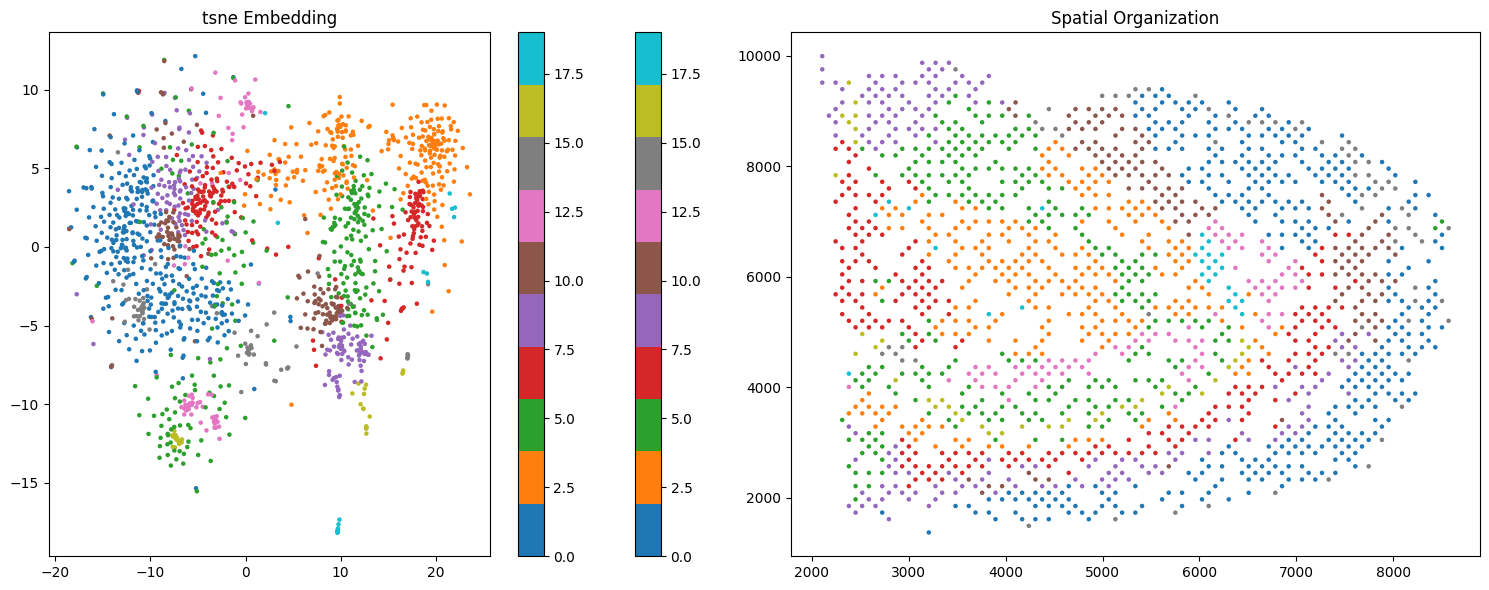

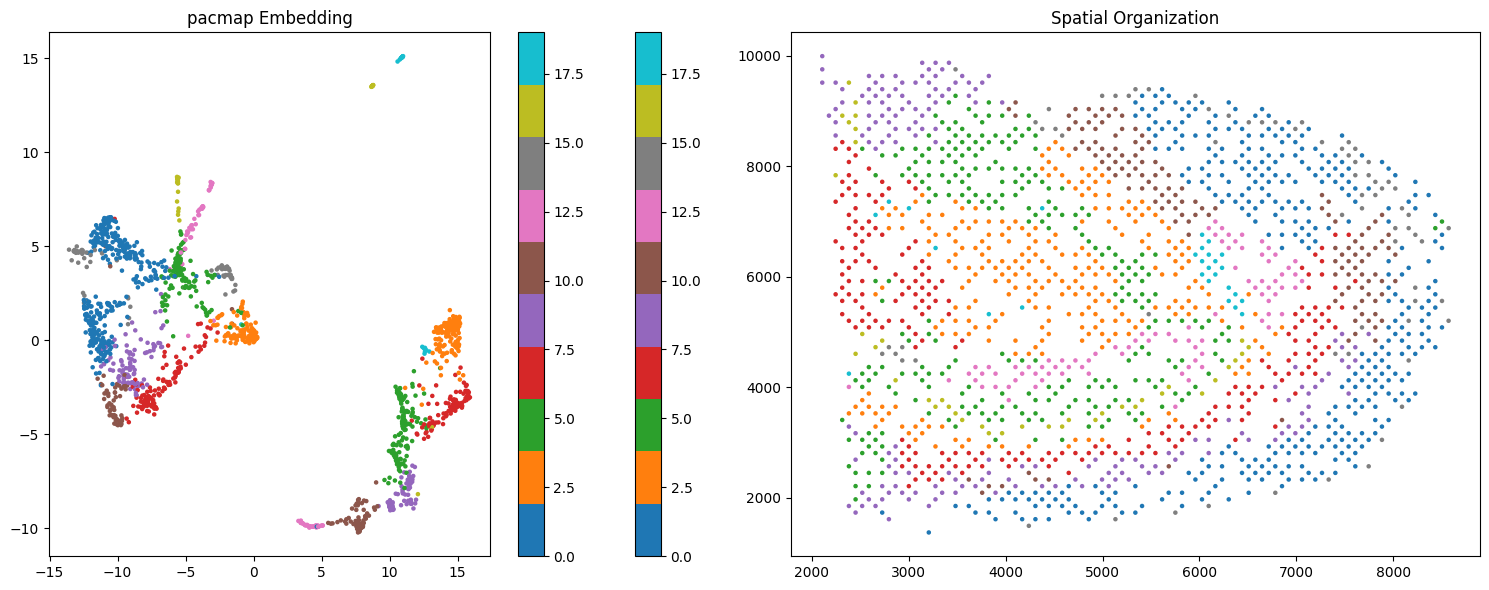

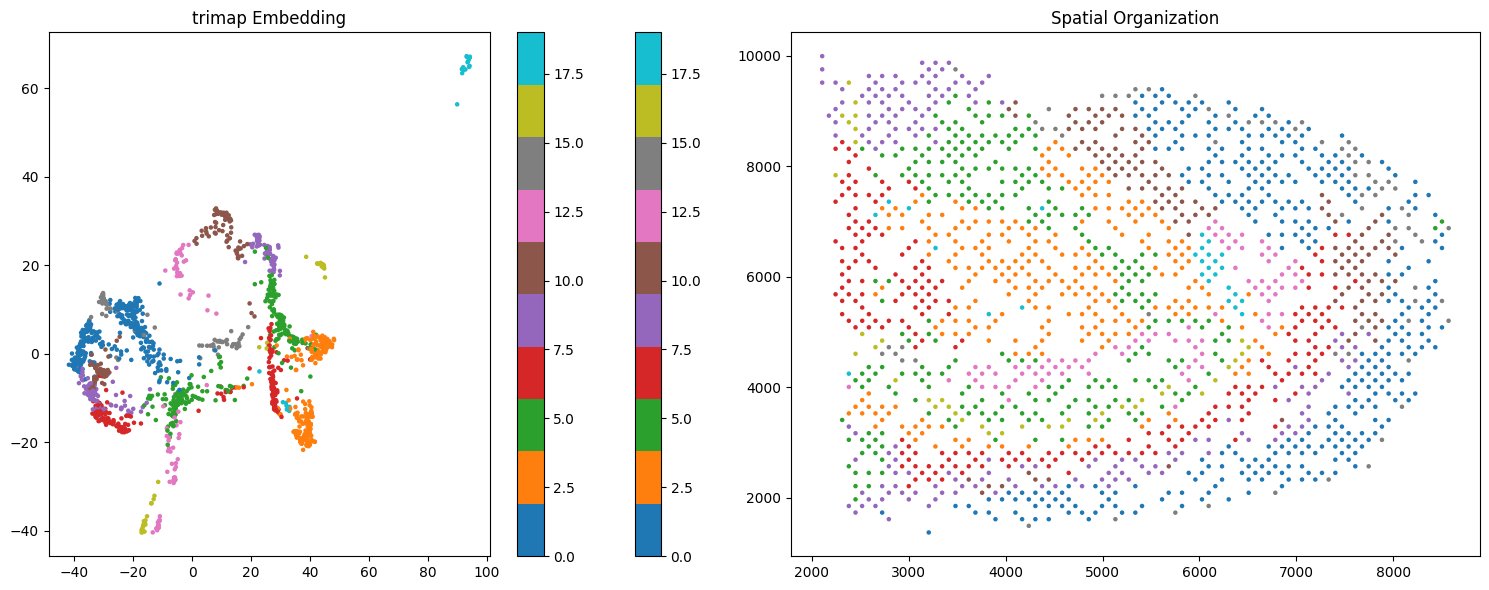

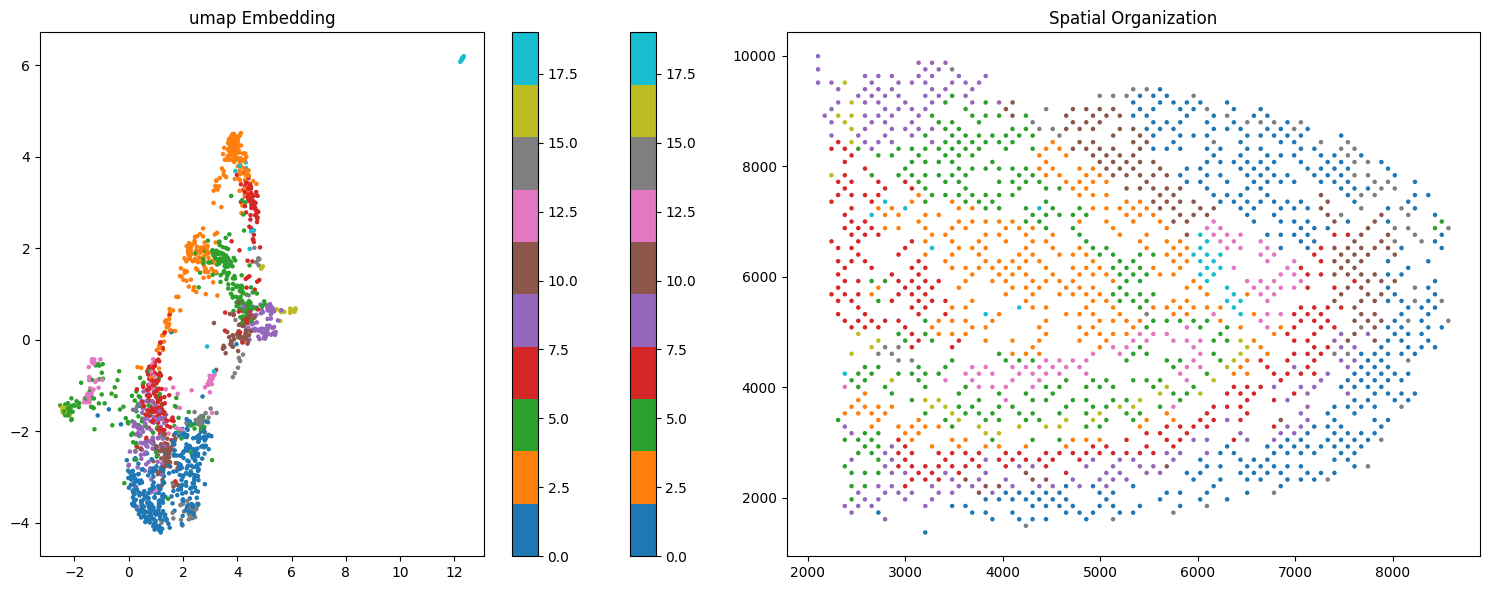

KNN with 3 nearest neighbors
Accuracy: 68.22%

KNN with 5 nearest neighbors
Accuracy: 71.38%

KNN with 10 nearest neighbors
Accuracy: 72.68%



In [11]:
embeddings_algorithms = ["tsne", "pacmap", "trimap", "umap"]

for embedding_algorithm in embeddings_algorithms:
    plot_and_evaluate_embedding(
        train_input.numpy(), 
        train_labels.numpy(), 
        train_spatial_coords,
        test_input.numpy(), 
        test_labels.numpy(),
        test_spatial_coords,
        embedding_algorithm,
        [3, 5, 10]
    )

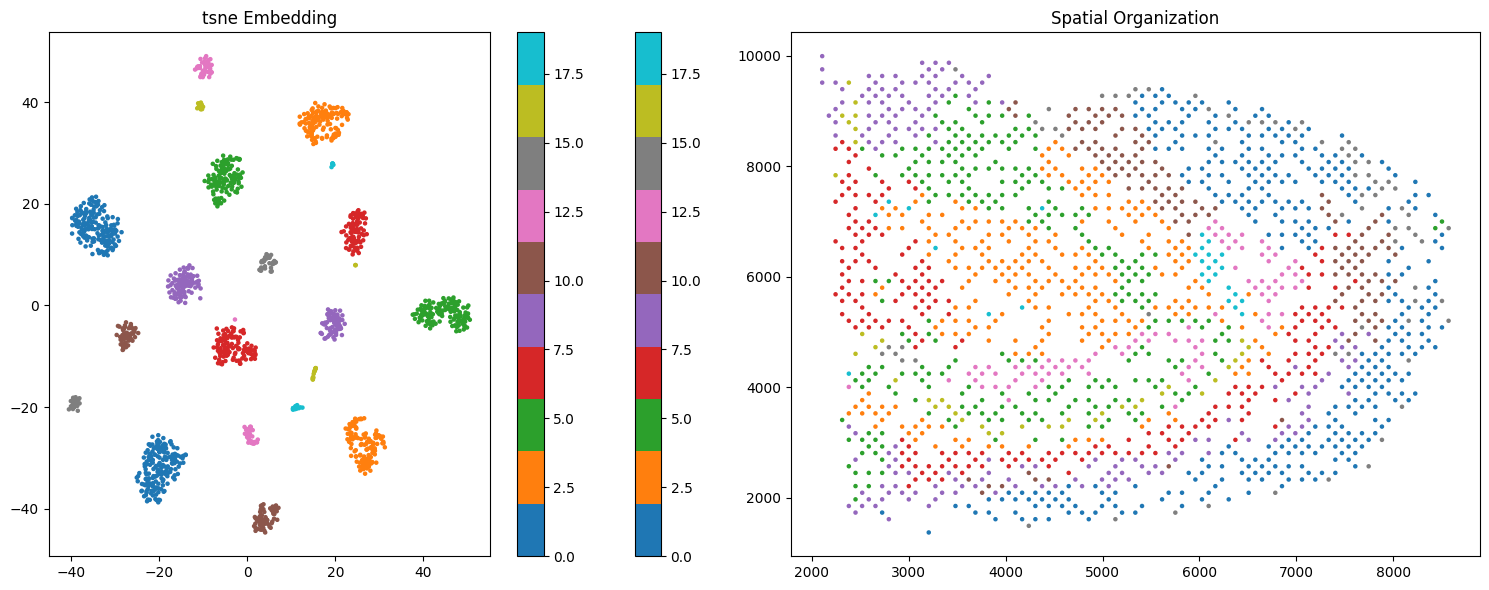

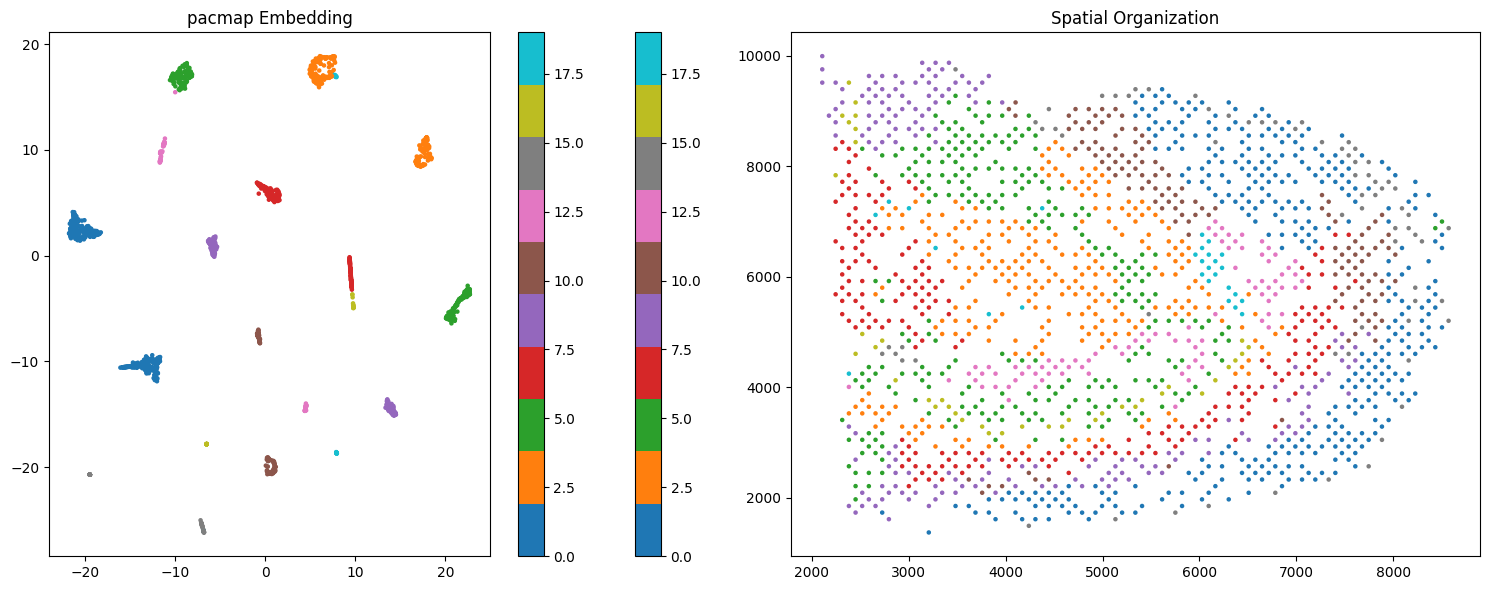

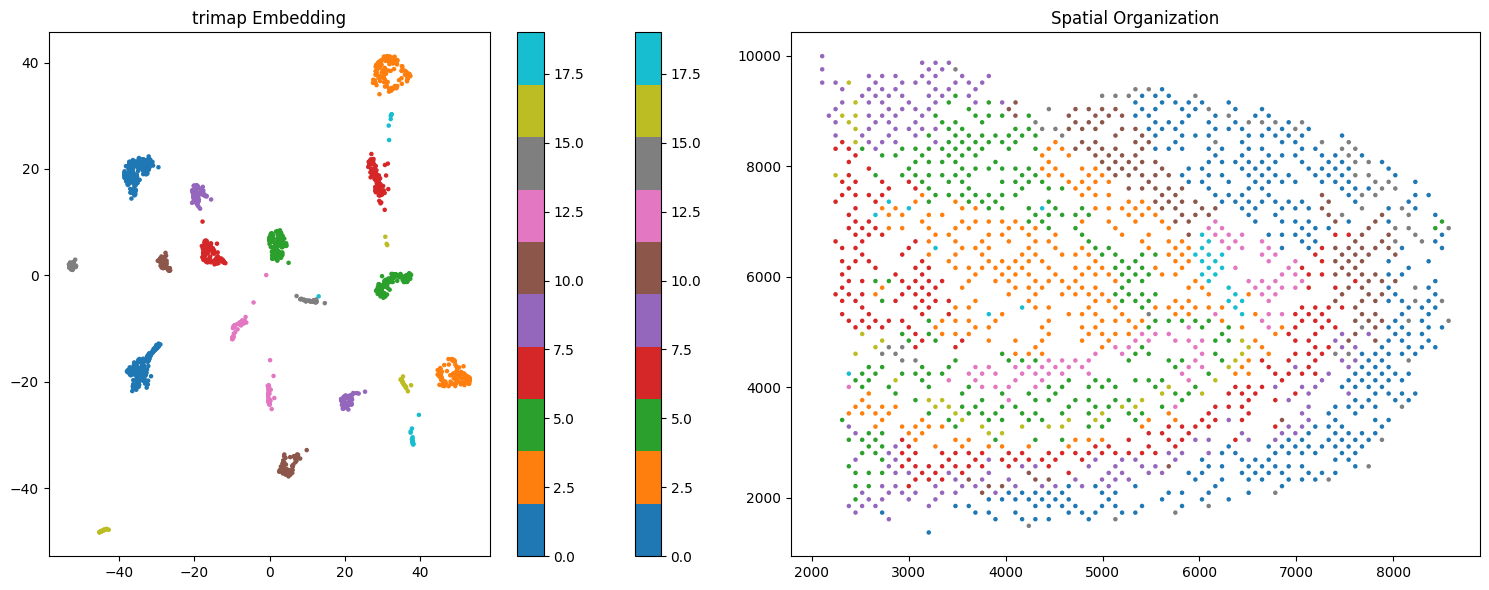

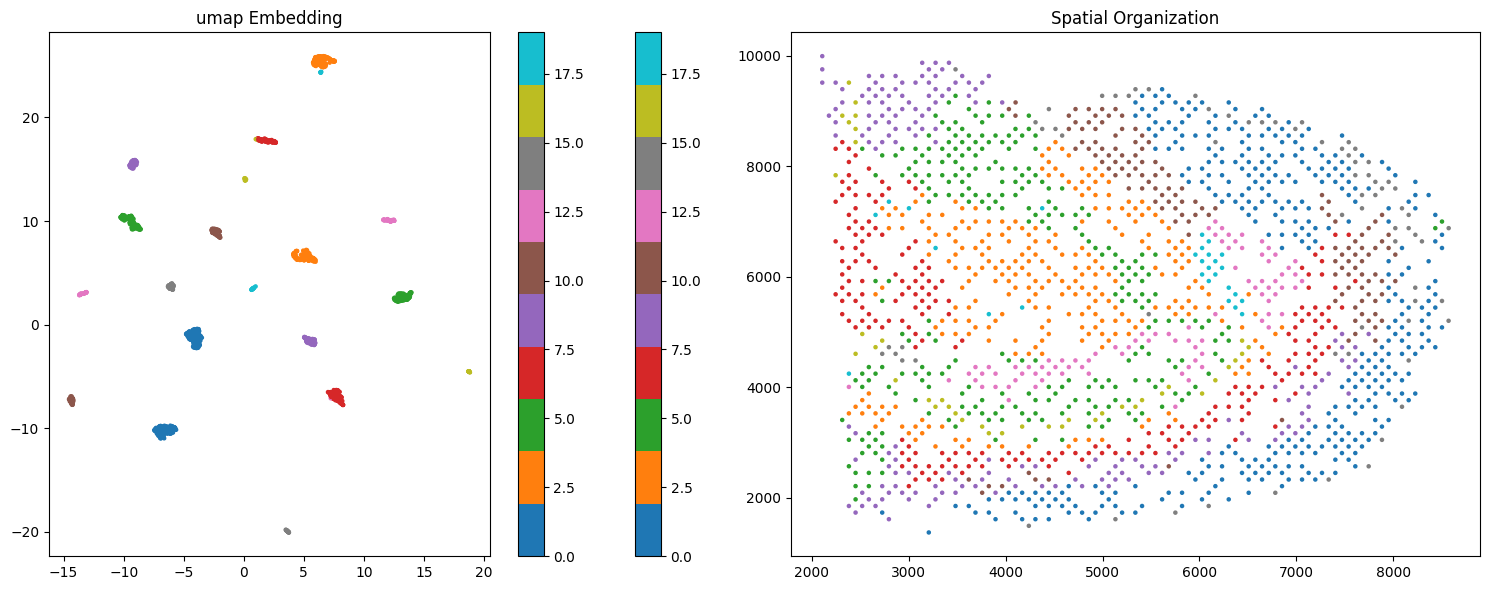

KNN with 3 nearest neighbors
Accuracy: 91.08%

KNN with 5 nearest neighbors
Accuracy: 91.26%

KNN with 10 nearest neighbors
Accuracy: 91.26%



In [12]:
for embedding_algorithm in embeddings_algorithms:
    plot_and_evaluate_embedding(
        train_hidden1.numpy(), 
        train_labels.numpy(), 
        train_spatial_coords,
        test_hidden1.numpy(), 
        test_labels.numpy(), 
        test_spatial_coords,
        embedding_algorithm,
        [3, 5, 10]
    )

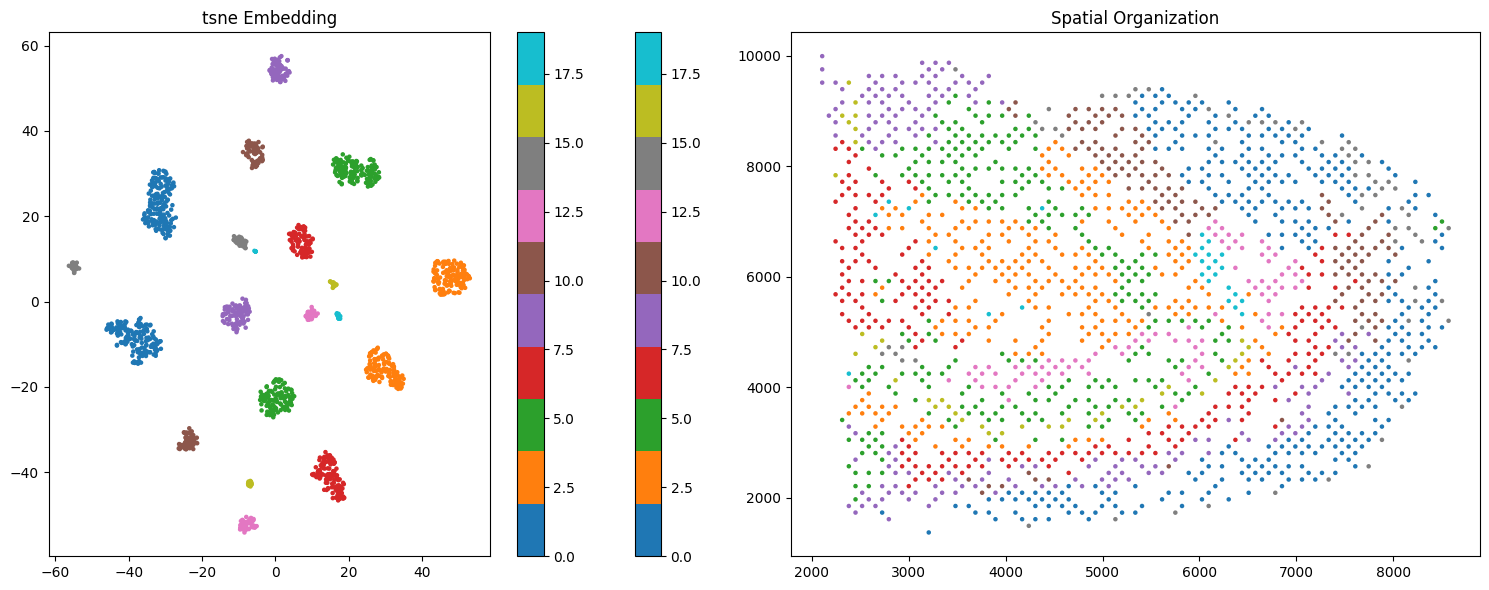

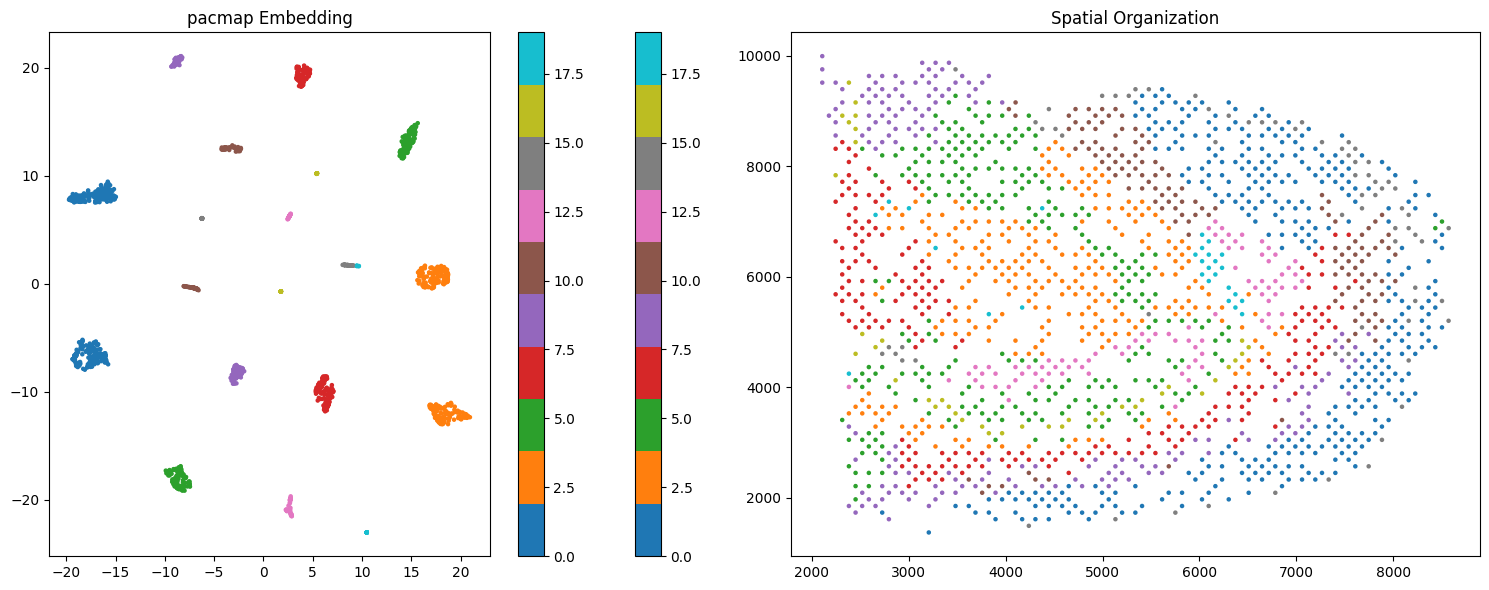

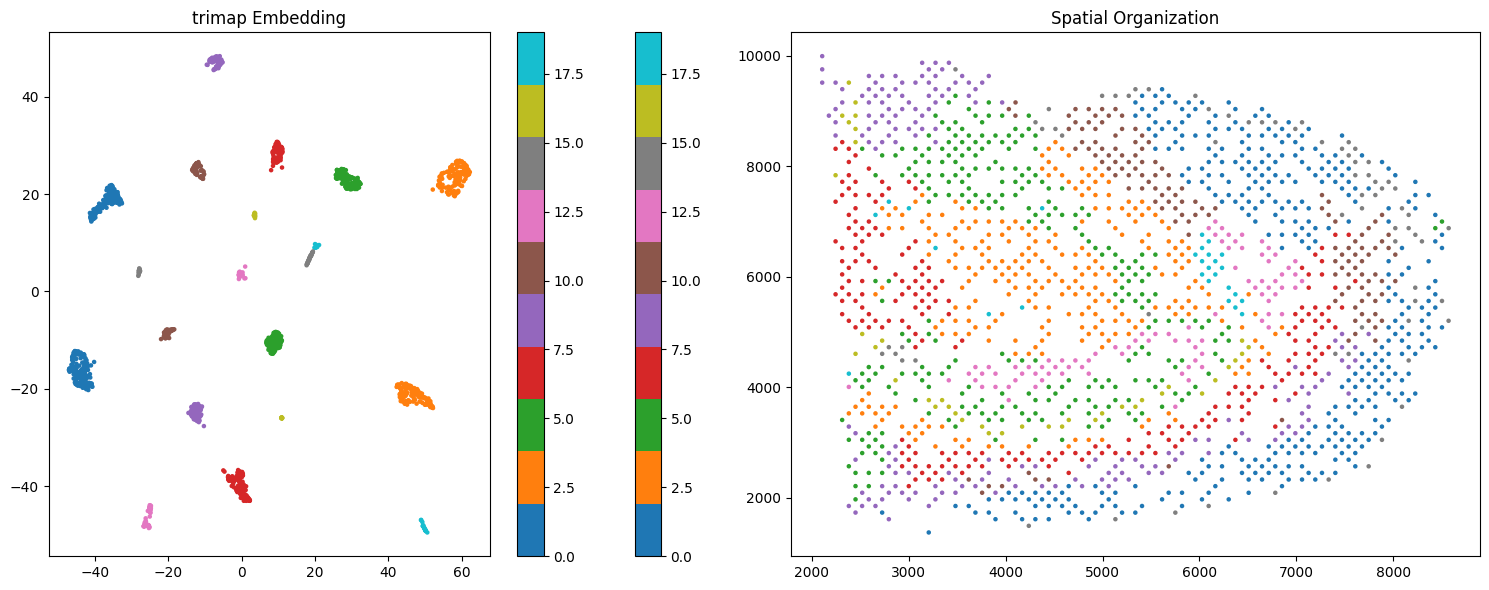

/Users/mnozkiewicz/Magisterka/Wizualizacja/venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


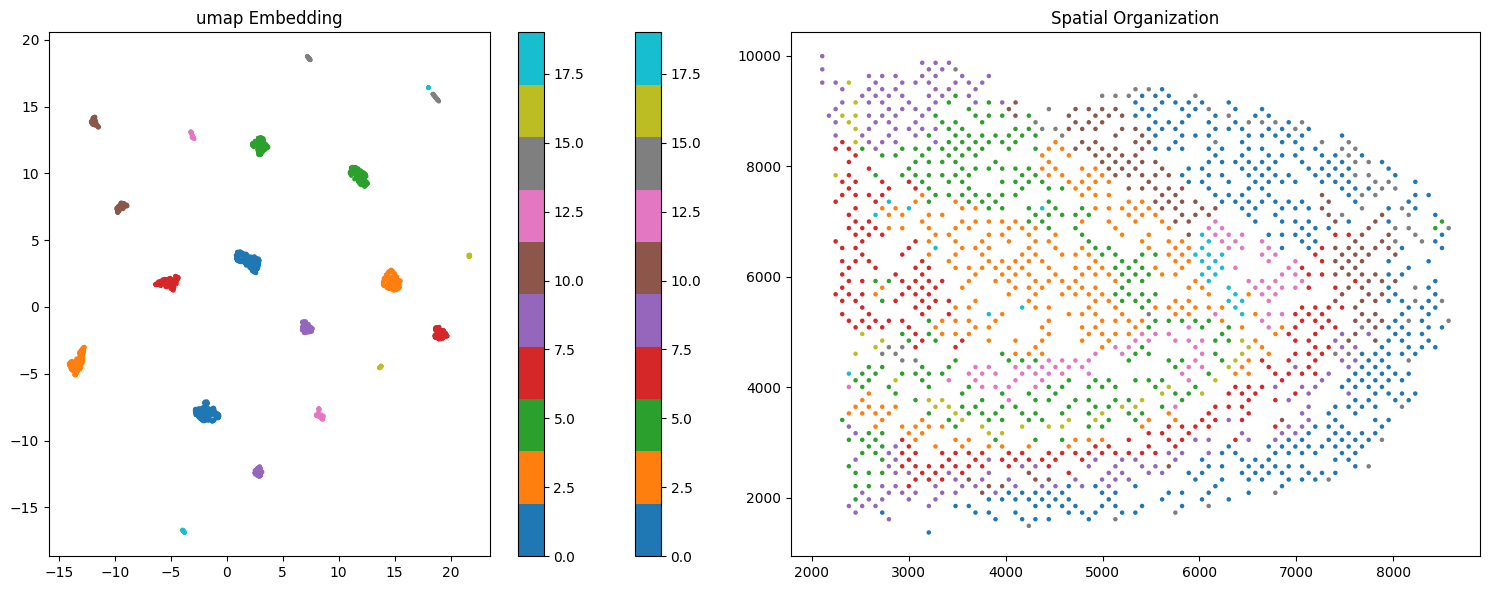

KNN with 3 nearest neighbors
Accuracy: 90.52%

KNN with 5 nearest neighbors
Accuracy: 90.52%

KNN with 10 nearest neighbors
Accuracy: 90.52%



In [13]:
for embedding_algorithm in embeddings_algorithms:
    plot_and_evaluate_embedding(
        train_hidden2.numpy(), 
        train_labels.numpy(), 
        train_spatial_coords,
        test_hidden2.numpy(), 
        test_labels.numpy(), 
        test_spatial_coords,
        embedding_algorithm,
        [3, 5, 10]
    )

## Excercise 2

Dataset shape: (2800, 16562)
Available annotations: ['in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster']


/Users/mnozkiewicz/Magisterka/Wizualizacja/venv/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


<Figure size 1200x1000 with 0 Axes>

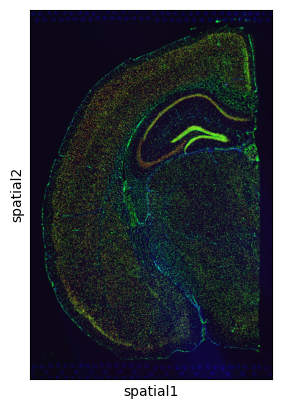

In [84]:
# Load breast cancer dataset
adata_bc = sq.datasets.visium_fluo_adata()
 
# Basic data exploration
print(f"Dataset shape: {adata_bc.shape}")
print(f"Available annotations: {list(adata_bc.obs.columns)}")
 
# Preprocess data
sc.pp.normalize_total(adata_bc, target_sum=1e4)
sc.pp.log1p(adata_bc)
sc.pp.highly_variable_genes(adata_bc, n_top_genes=2000)
adata_bc_hvg = adata_bc[:, adata_bc.var.highly_variable]
sc.pp.scale(adata_bc_hvg)
 
# View tissue structure
plt.figure(figsize=(12, 10))
sc.pl.spatial(adata_bc, img_key="hires", size=1.5)

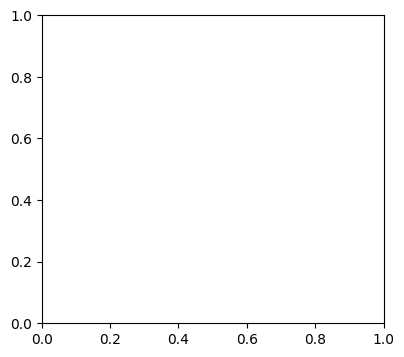

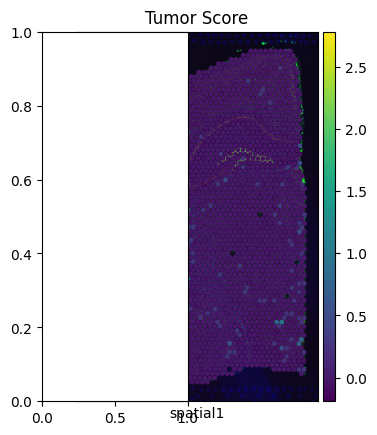

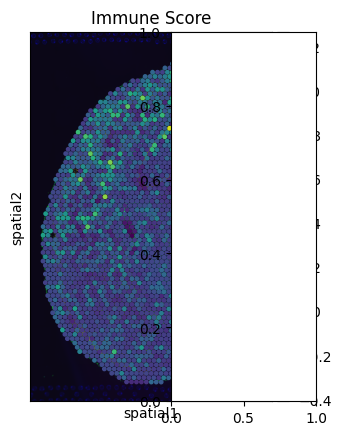

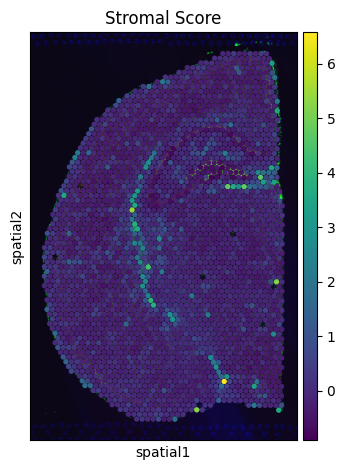

In [85]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Define marker genes for different cell types
tumor_markers = ['Epcam', 'Krt17', 'Krt8', 'Krt18']
immune_markers = ['Cd34', 'Cd4', 'Cd84', 'Cd68', 'Cd163']
stromal_markers = ['Col1a1', 'Vim', 'Acta2', 'Fap']
 
# Calculate scores for each cell type
sc.tl.score_genes(adata_bc, tumor_markers, score_name='tumor_score')
sc.tl.score_genes(adata_bc, immune_markers, score_name='immune_score')
sc.tl.score_genes(adata_bc, stromal_markers, score_name='stromal_score')
 
 
# Visualize cell type scores
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sc.pl.spatial(adata_bc, color='tumor_score', size=1.5, show=False)
plt.title('Tumor Score')
plt.subplot(1, 3, 2)
sc.pl.spatial(adata_bc, color='immune_score', size=1.5, show=False)
plt.title('Immune Score')
plt.subplot(1, 3, 3)
sc.pl.spatial(adata_bc, color='stromal_score', size=1.5, show=False)
plt.title('Stromal Score')
plt.tight_layout()
plt.show()

In [86]:
X_bc = adata_bc_hvg.X.copy()
labels = np.argmax(adata_bc.obs.loc[:, ['tumor_score', 'immune_score', 'stromal_score']].to_numpy(), axis=1)

In [87]:
class AutoEncoderDataset(Dataset):
    def __init__(self, X):
        self.X = torch.from_numpy(X)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx]

indices = np.arange(len(X_bc))

X_train, X_temp, train_ind, temp_ind = train_test_split(X_bc, indices, test_size=0.4, random_state=42)
X_val, X_test, val_ind, test_ind = train_test_split(X_temp, temp_ind, test_size=0.5, random_state=42)

train_loader = DataLoader(AutoEncoderDataset(X_train), batch_size=64)
val_loader = DataLoader(AutoEncoderDataset(X_val), batch_size=64)
test_loader = DataLoader(AutoEncoderDataset(X_test), batch_size=64)

In [88]:
class AutoEncoder(nn.Module):

    def __init__(self, encoding_dim: int = 64):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(2000, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, encoding_dim)
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 2000),
            nn.Tanh(),
        )
 
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    @torch.no_grad
    def encode(self, x: torch.Tensor) -> torch.Tensor:
        return self.encoder(x)

In [89]:
import torch.optim as optim
from copy import deepcopy
from typing import Callable


def evaluate_autoencoder(
        model: AutoEncoder,
        loader: DataLoader,
        loss_fn: Callable
    ) -> float:

    total_loss = 0.0
    number_of_batches = 0
    model = model.eval()

    with torch.no_grad():
        for images in loader:
            outputs = model(images)
            
            batch_loss = loss_fn(outputs, images)
            total_loss += batch_loss.item()

            number_of_batches += 1

    average_loss = total_loss / number_of_batches
    return average_loss
    

def train_autoencoder(
        model: AutoEncoder, 
        train_loader: DataLoader,
        val_loader: DataLoader,
    ) -> AutoEncoder:

    optimizer = optim.AdamW(model.parameters())
    criterion = nn.MSELoss()

    best_model, best_loss = model, float("inf")
    steps_without_improvement = 0
    train_losses, val_losses = [], []

    for epoch in range(20):
        epoch_loss = 0.0
        number_of_batches = 0
        model.train()

        for inputs in train_loader:

            outputs = model(inputs)
            batch_loss = criterion(outputs, inputs)
            batch_loss.backward()

            optimizer.step()
            optimizer.zero_grad()
        
            epoch_loss += batch_loss.item()
            number_of_batches += 1
        
        train_loss = epoch_loss / number_of_batches
        train_losses.append(train_loss)

        val_loss = evaluate_autoencoder(model, val_loader, criterion)
        val_losses.append(val_loss)

        if epoch % 4 == 0:
            print(f"Epoch {epoch}")
            print(f"Train average loss: {train_loss:.3f}, Validation average loss: {val_loss:.3f}")

        if val_loss < best_loss:
            steps_without_improvement = 0
            best_loss = val_loss
            best_model = deepcopy(model)
        else:
            steps_without_improvement += 1
            if steps_without_improvement > 2:
                print("Early stopping")
                print(f"Epoch {epoch}")
                print(f"Train average loss: {train_loss:.3f}, Validation average loss: {val_loss:.3f}")
                break 
    
    plot_training_stats(train_losses, val_losses)
    return best_model

Epoch 0
Train average loss: 0.991, Validation average loss: 0.980
Epoch 4
Train average loss: 0.907, Validation average loss: 0.944
Epoch 8
Train average loss: 0.883, Validation average loss: 0.940
Epoch 12
Train average loss: 0.861, Validation average loss: 0.935
Epoch 16
Train average loss: 0.850, Validation average loss: 0.935
Early stopping
Epoch 16
Train average loss: 0.850, Validation average loss: 0.935


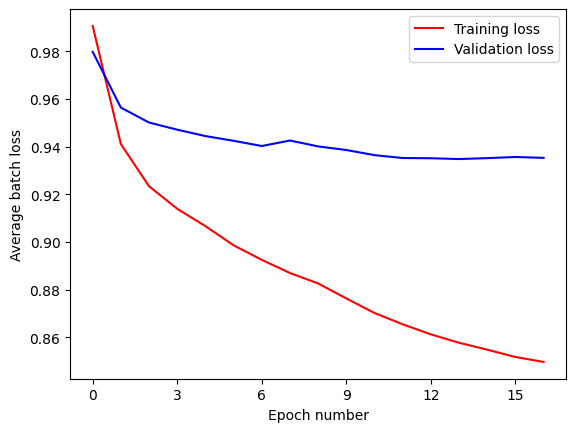

In [90]:
autoencoder = AutoEncoder(encoding_dim=64)
autoencoder = train_autoencoder(autoencoder, train_loader, val_loader)

In [91]:
def retrieve_autoencoder_outputs(model: AutoEncoder, loader: DataLoader) -> torch.Tensor:
    all_hidden_states = []

    for batch in loader:
        batch_hidden_states = model.encode(batch)
        all_hidden_states.append(batch_hidden_states)

    return torch.concat(all_hidden_states)

In [95]:
train_input.shape

(1680, 2000)

In [ ]:
train_input = X_bc[train_ind]
train_labels = labels[train_ind]
train_spatial_coords = adata_bc.obsm['spatial'][train_ind]

test_input = X_bc[test_ind]
test_labels = labels[test_ind]
test_spatial_coords = adata_bc.obsm['spatial'][test_ind]

train_hidden = retrieve_autoencoder_outputs(autoencoder, train_loader).numpy()
test_hidden = retrieve_autoencoder_outputs(autoencoder, test_loader).numpy()


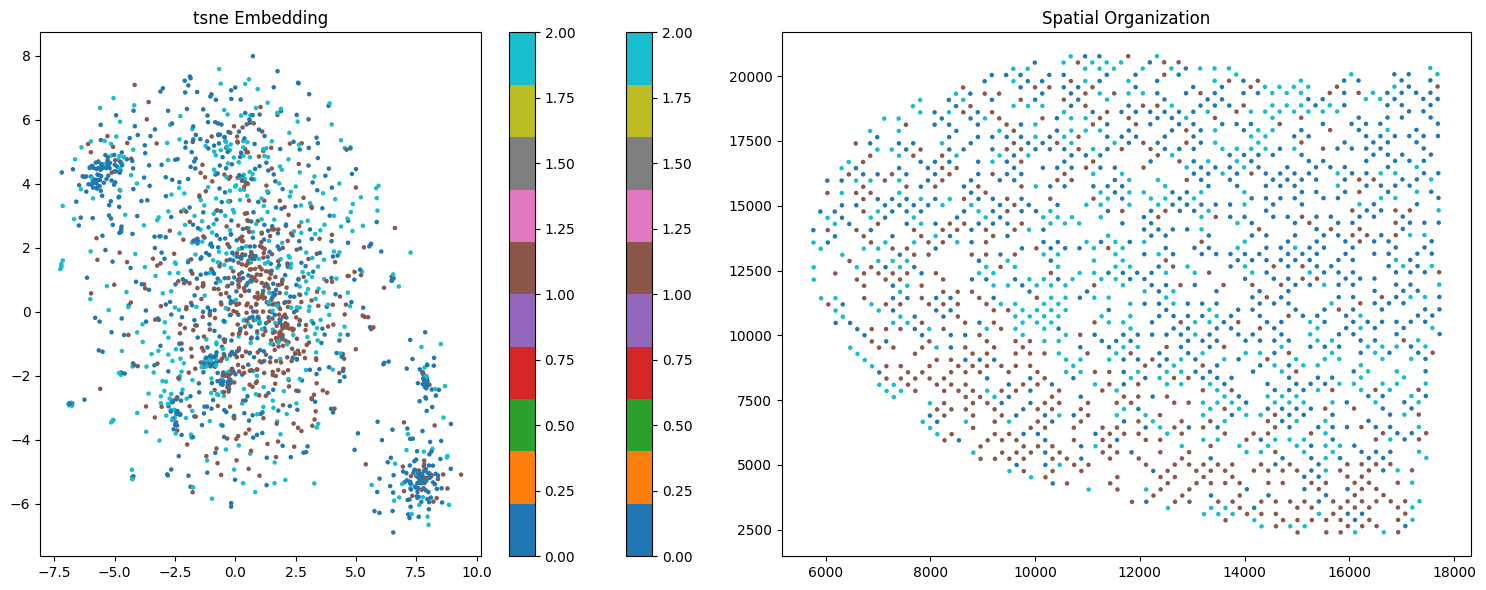

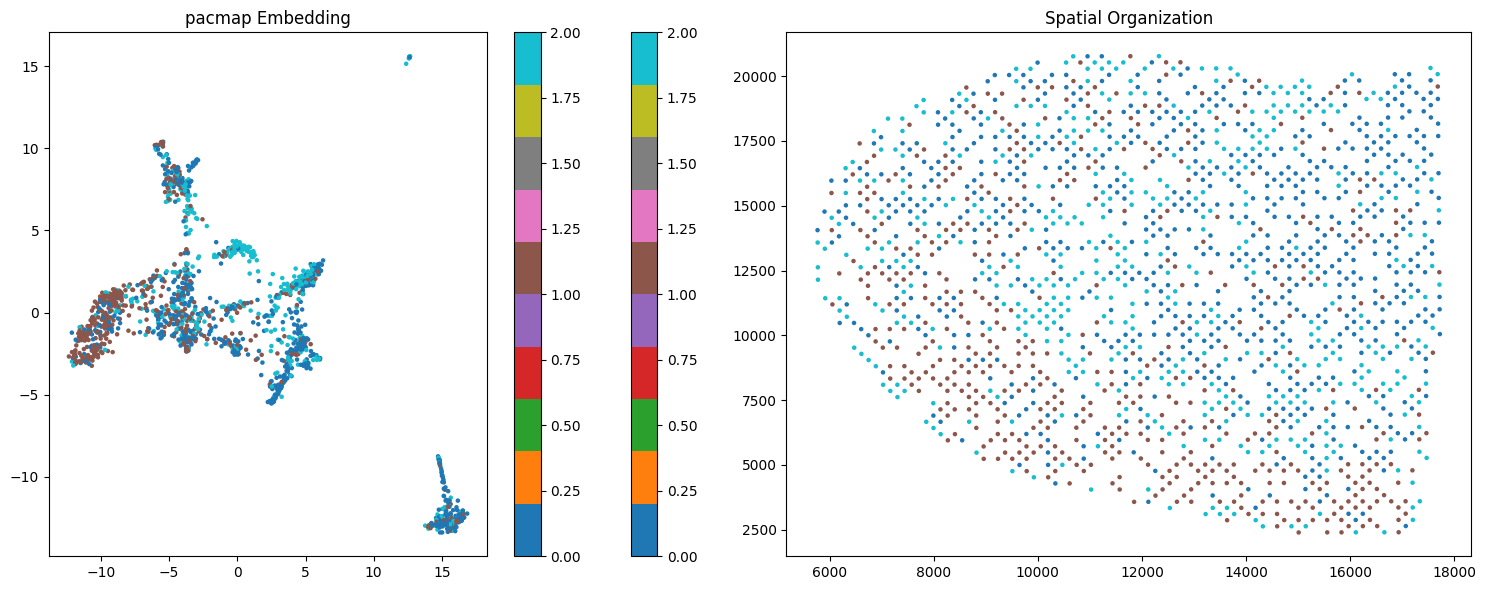

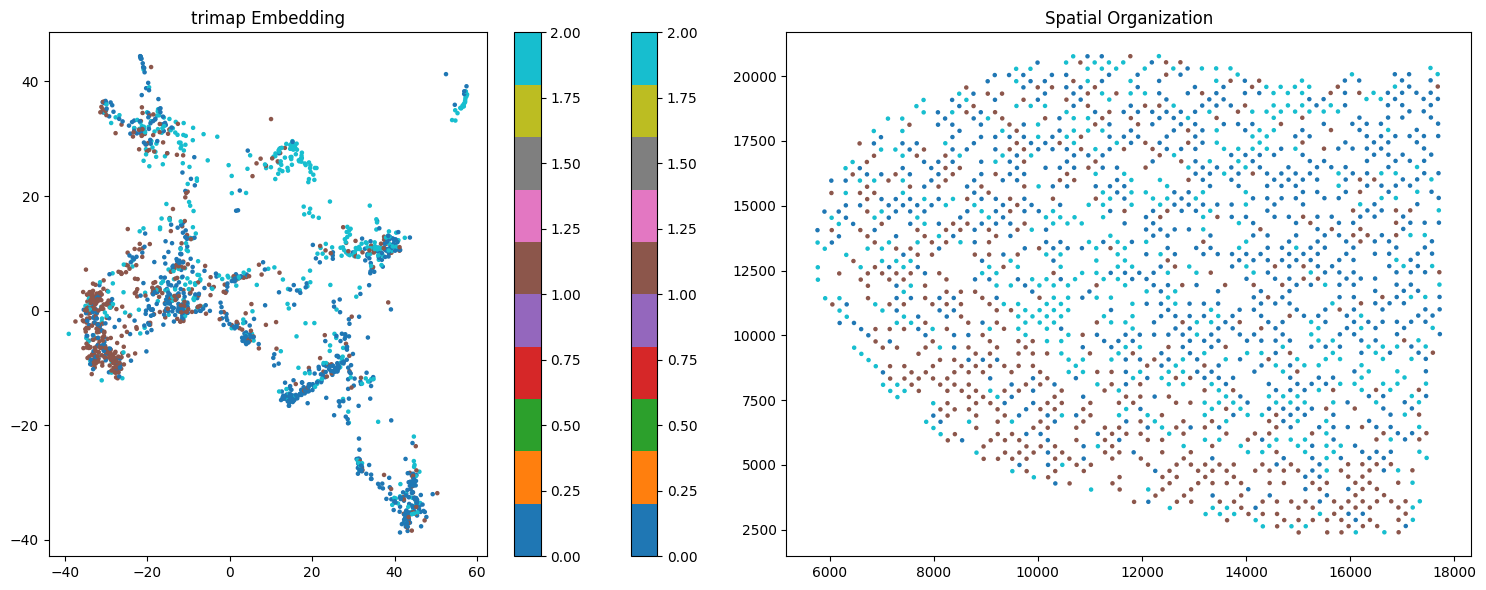

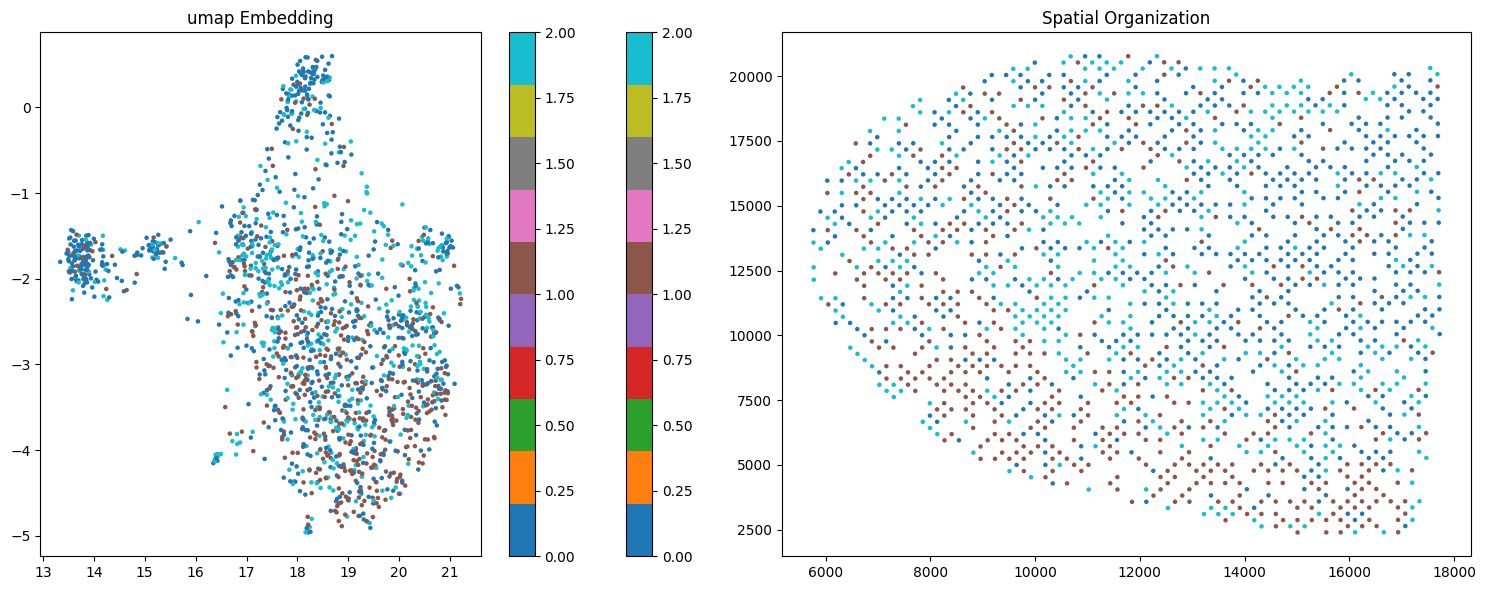

KNN with 3 nearest neighbors
Accuracy: 47.32%

KNN with 5 nearest neighbors
Accuracy: 48.57%

KNN with 10 nearest neighbors
Accuracy: 51.96%



In [98]:
embeddings_algorithms = ["tsne", "pacmap", "trimap", "umap"]

for embedding_algorithm in embeddings_algorithms:
    plot_and_evaluate_embedding(
        train_input, 
        train_labels, 
        train_spatial_coords,
        test_input, 
        test_labels,
        test_spatial_coords,
        embedding_algorithm,
        [3, 5, 10]
    )

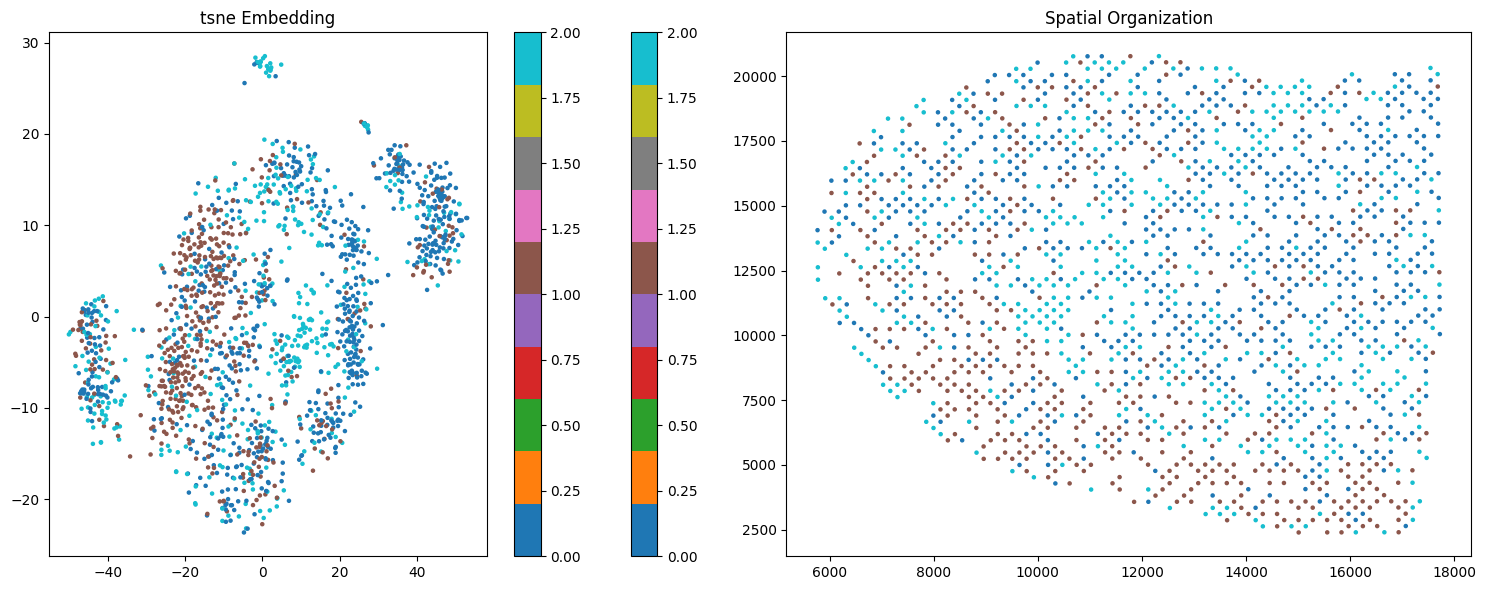

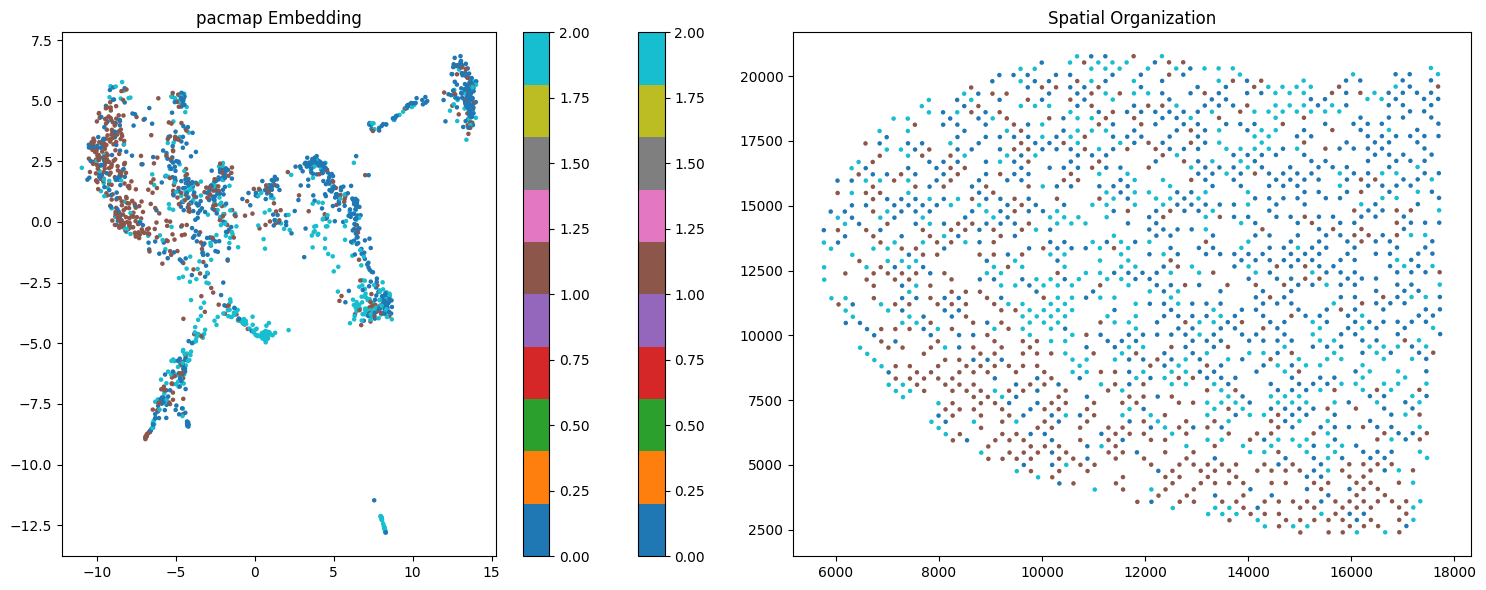

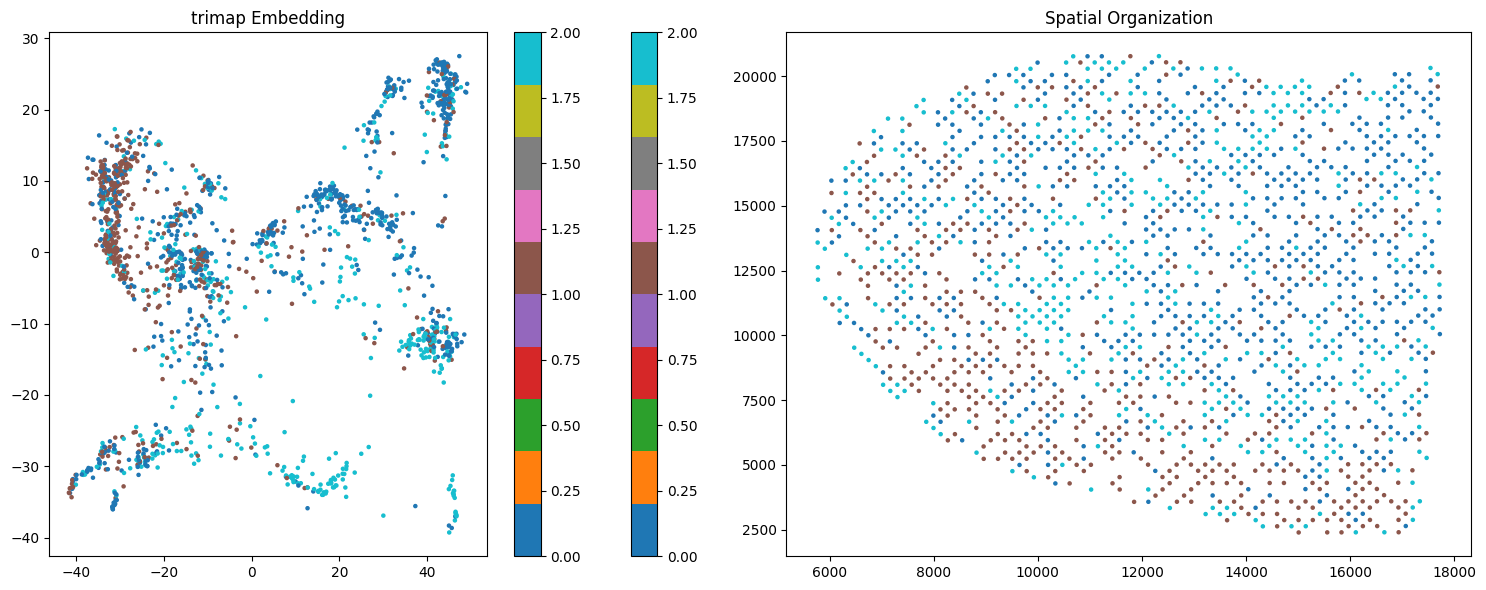

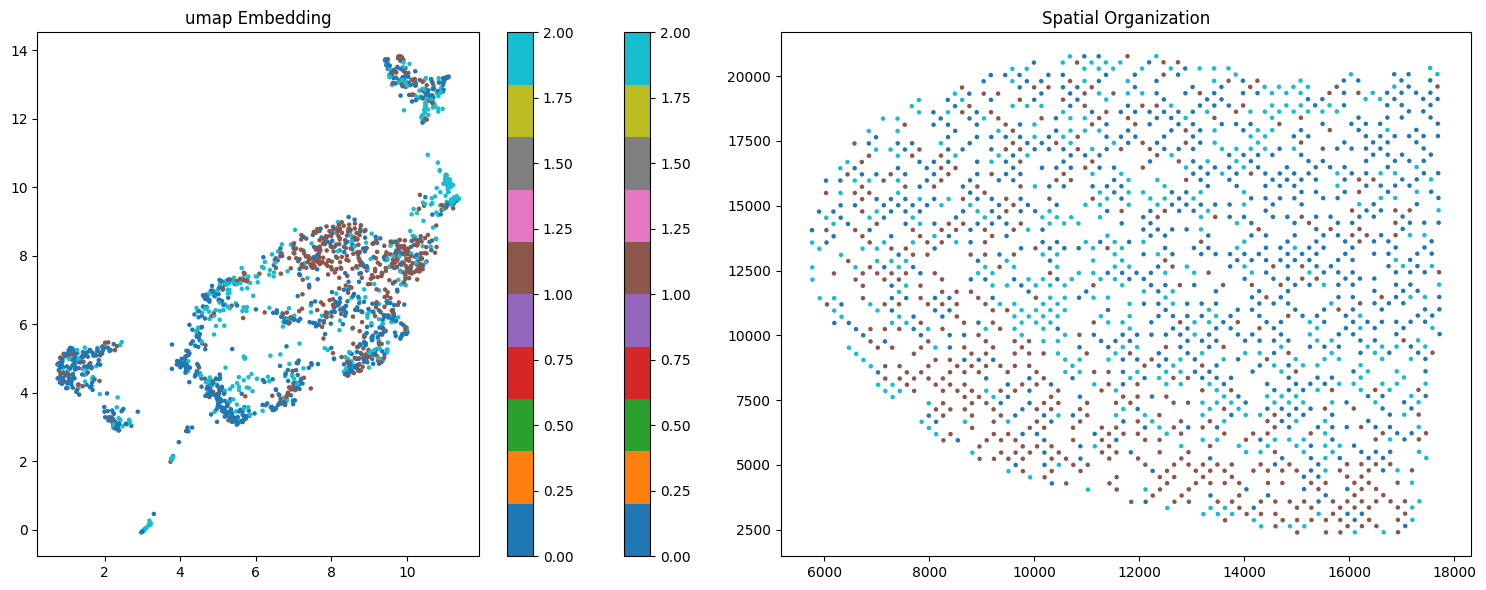

KNN with 3 nearest neighbors
Accuracy: 56.61%

KNN with 5 nearest neighbors
Accuracy: 57.68%

KNN with 10 nearest neighbors
Accuracy: 59.29%



In [99]:
for embedding_algorithm in embeddings_algorithms:
    plot_and_evaluate_embedding(
        train_hidden, 
        train_labels, 
        train_spatial_coords,
        test_hidden, 
        test_labels,
        test_spatial_coords,
        embedding_algorithm,
        [3, 5, 10]
    )

<Figure size 1000x800 with 0 Axes>

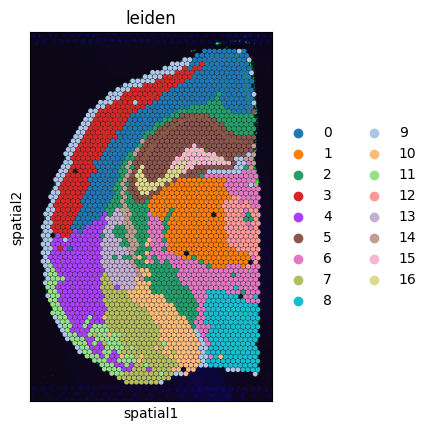

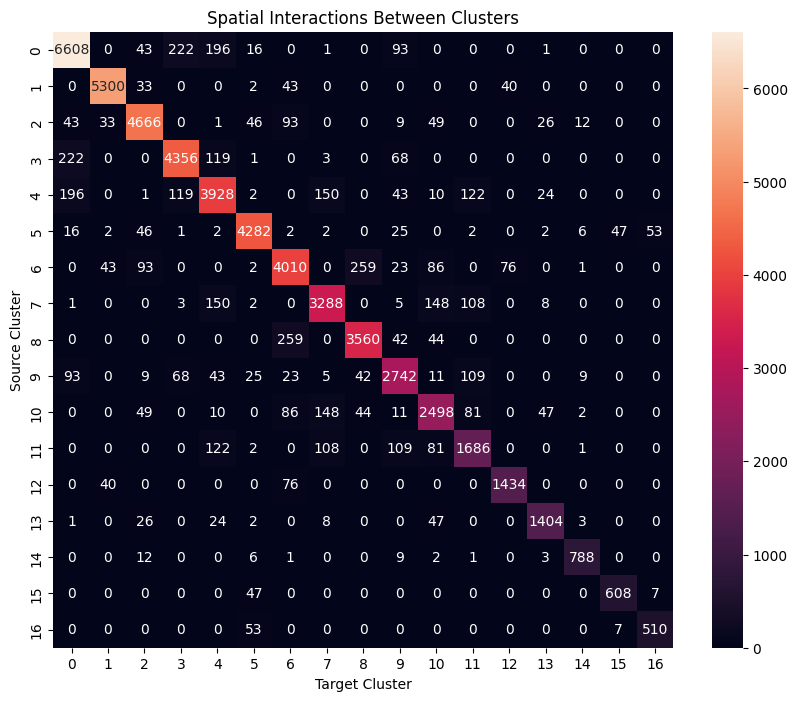

In [110]:
import seaborn as sns

# Compute neighborhood graph to analyze cell-cell interactions
sc.pp.neighbors(adata_bc, use_rep='X_pca')
 
# Find clusters/regions
sc.tl.leiden(adata_bc, resolution=0.8)
 
# Visualize clusters in spatial context
plt.figure(figsize=(10, 8))
sc.pl.spatial(adata_bc, color='leiden', size=1.5)
 
# Compute interaction scores between regions
def compute_interactions(adata, cluster_key='leiden'):
    # Count neighbors of different clusters for each spot
    clusters = adata.obs[cluster_key].cat.categories
    n_clusters = len(clusters)
 
    # Get the indices of nearest neighbors from the connectivities matrix
    connectivity = adata.obsp['connectivities']
 
    # Initialize interaction matrix
    interaction_matrix = np.zeros((n_clusters, n_clusters))
 
    # For each spot, count interactions with spots of different clusters
    for i in range(adata.n_obs):
        # Get the cluster of the current spot
        current_cluster = adata.obs[cluster_key][i]
        current_idx = np.where(clusters == current_cluster)[0][0]
 
        # Get indices of neighbors
        neighbors = connectivity[i].nonzero()[1]
 
        # Count neighbors by cluster
        for neighbor in neighbors:
            neighbor_cluster = adata.obs[cluster_key][neighbor]
            neighbor_idx = np.where(clusters == neighbor_cluster)[0][0]
            interaction_matrix[current_idx, neighbor_idx] += 1
 
    return interaction_matrix, clusters
 
# Compute and visualize interactions
interaction_matrix, cluster_names = compute_interactions(adata_bc)
 
# Visualize interaction matrix
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_matrix, annot=True, fmt='.0f',
            xticklabels=cluster_names, yticklabels=cluster_names)
plt.title('Spatial Interactions Between Clusters')
plt.xlabel('Target Cluster')
plt.ylabel('Source Cluster')
plt.show()